In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import layers,Sequential,optimizers

Importacion de librerias a necesitar


In [3]:
from keras.utils import Sequence
import numpy as np   

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

MUSIC_PATH = "./AB_normalizado.csv"
MUSIC_PATH_TRANS = "features.csv"


BillboardHot100.csv es el dataset a utilizar que contiene datos de canciones y su ranking, ademas del escritor o escritores ,los features y genero de la cancion

A.csv contiene ya una matriz de Artista x Caracteristicas, donde se vectoriza cada genero, escritor, de cada artista correspondiente, fue un trabajo bastante pesado porque se tuvo que crear un dataset completamente nuevo recopilando, organizando y agrupando datos de una mejor manera para el problema a resolver

B.csv contiene la transpuesta de A y AB contiene la multiplicacion de A y su transpuesta
AB.csv normalizada contiene AB/k k=2 para que todos los valores esten entre 0 y 1
features.csv es una matriz Artista x Artista la cual contiene 1 en la casilla si el artista i hizo algun feature con el artista j (el valor de la diagonal siempre es 1)

In [4]:
def load_music_data(music_path = MUSIC_PATH):
    csv_path = os.path.join(music_path)
    return pd.read_csv(csv_path,index_col=0)

Se procede a cargar los dataset


In [5]:


AB = load_music_data()
AB = pd.DataFrame(AB)
AB = AB.to_numpy()
dt = load_music_data(MUSIC_PATH_TRANS)
dt = pd.DataFrame(dt)
H = dt.to_numpy()

AB = AB.flatten()
H = H.flatten()

X_train, X_test, Y_train, Y_test = train_test_split(AB, H, test_size=0.9)
train_gen = DataGenerator(X_train, Y_train, 32)
test_gen = DataGenerator(X_test, Y_test, 32)

Se agregaron 4 capas al modelo:

In [6]:

import joblib
import keras
capa = layers.Dense(units=1,input_shape=1)
capa1 = layers.Dense(units=5,activation='relu')
capa2 = layers.Dense(units=5,activation='relu')
final = layers.Dense(units=1,activation='sigmoid')



In [10]:
modelo = Sequential(
    [capa,capa1,capa2,final]
)
modelo.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print("Entrenado Modelo")


Entrenado Modelo


Se procede a entrenar el modelo con el 10% de los datos debido a la gran cantidad de datos que teniamos y 10 epochs

In [11]:
history = modelo.fit(train_gen,
                    validation_data=test_gen, epochs=10)



Epoch 1/10
15181/15181 [==============================] - 142s 9ms/step - loss: 0.0074 - accuracy: 0.9986 - val_loss: 0.0073 - val_accuracy: 0.9985
Epoch 2/10
15181/15181 [==============================] - 128s 8ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.0069 - val_accuracy: 0.9985
Epoch 3/10
15181/15181 [==============================] - 147s 10ms/step - loss: 0.0064 - accuracy: 0.9991 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 4/10
15181/15181 [==============================] - 144s 10ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 5/10
15181/15181 [==============================] - 150s 10ms/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9990
Epoch 6/10
15181/15181 [==============================] - 164s 11ms/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.0066 - val_accuracy: 0.9990
Epoch 7/10
15181/15181 [==============================] - 172s 11ms/step - loss: 0.0062 - accuracy: 0.9991 -

In [18]:
print("Modelo Entrenado")
modelo.save("modelo_capa.h5")



Modelo Entrenado


In [20]:
loss , acurracy = modelo.evaluate(X_test,Y_test)
print(acurracy)

136621/136621 [==============================] - 160s 1ms/step - loss: 0.0066 - accuracy: 0.9990
0.9990290403366089


In [21]:
modelo.get_weights()


[array([[0.7569959]], dtype=float32),
 array([-0.462826], dtype=float32),
 array([[ 0.3080351, -1.0788965, -1.1789477,  3.2389674, -0.7762517]],
       dtype=float32),
 array([-0.08533186,  0.34332988,  0.4515734 ,  0.20583996,  0.44377416],
       dtype=float32),
 array([[ 0.78362083,  0.42562148,  0.67853504, -0.6168331 ,  0.2183187 ],
        [-0.30437097,  1.1583351 ,  0.5556266 ,  0.48788583,  0.47330248],
        [ 0.31328905,  0.04795428,  1.0829296 ,  1.298686  , -0.75809515],
        [-0.10010149, -2.1539927 , -2.276665  , -1.9050446 , -0.56888026],
        [-0.51892185,  1.1535773 ,  1.2618618 ,  0.6348801 , -0.68822837]],
       dtype=float32),
 array([-0.02091344,  0.46669042,  0.46402872,  0.41283968,  0.        ],
       dtype=float32),
 array([[ 0.7033373 ],
        [-1.2818853 ],
        [-1.3124565 ],
        [-1.1730691 ],
        [ 0.34601474]], dtype=float32),
 array([2.0885253], dtype=float32)]

In [22]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

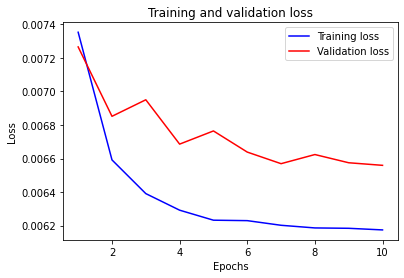

In [24]:
import matplotlib.pyplot as plt

acc = history_dict["accuracy"]
val_b = history_dict['val_accuracy']
val_l = history_dict['val_loss']
loss = history_dict["loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_l, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


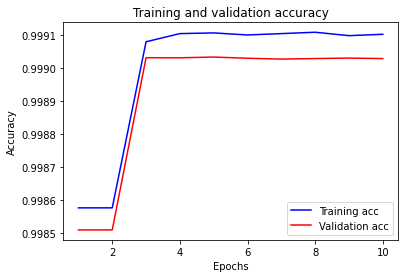

In [25]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_b, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [36]:
result = modelo.predict(X_train)
result


15181/15181 [==============================] - 14s 941us/step


array([[0.00031443],
       [0.00252275],
       [0.00053462],
       ...,
       [0.00031443],
       [0.00070763],
       [0.00047251]], dtype=float32)

In [37]:
result = np.round(result)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=result,y_true=Y_train)

In [38]:
print(cm)

[[485053     17]
 [   419    272]]


Procedemos a redondear los resultados dados para que tomen valores 0 o 1 
Matriz de confusion para comparar los resultados de la prediccion con los resultados reales utilizando ya el 90% del dataset

In [39]:
result = modelo.predict(X_test)
result = np.round(result)
cm = confusion_matrix(y_pred=result,y_true=Y_test)

136621/136621 [==============================] - 127s 930us/step


In [40]:
print(cm)

[[4365152     192]
 [   4053    2458]]


Como se pude observar en la diagonal se encuentran los valores predecidos correctamente